<a href="https://colab.research.google.com/github/msatmod/R/blob/main/time_series_analysis_in_r.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
mydata <- read.csv('../input/germany-electricity-power-for-20062017/opsd_germany_daily.csv')
head(mydata)
tail(mydata)

,Date,Consumption,Wind,Solar,Wind.Solar
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
1,2006-01-01,1069.184,NA,NA,NA
2,2006-01-02,1380.521,NA,NA,NA
3,2006-01-03,1442.533,NA,NA,NA
4,2006-01-04,1457.217,NA,NA,NA
5,2006-01-05,1477.131,NA,NA,NA
6,2006-01-06,1403.427,NA,NA,NA


,Date,Consumption,Wind,Solar,Wind.Solar
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
4378,2017-12-26,1130.117,717.453,30.923,748.376
4379,2017-12-27,1263.941,394.507,16.530,411.037
4380,2017-12-28,1299.864,506.424,14.162,520.586
4381,2017-12-29,1295.088,584.277,29.854,614.131
4382,2017-12-30,1215.449,721.247,7.467,728.714
4383,2017-12-31,1107.115,721.176,19.980,741.156


In [ ]:
str(mydata)

'data.frame':	4383 obs. of  5 variables:
 $ Date       : chr  "2006-01-01" "2006-01-02" "2006-01-03" "2006-01-04" ...
 $ Consumption: num  1069 1381 1443 1457 1477 ...
 $ Wind       : num  NA NA NA NA NA NA NA NA NA NA ...
 $ Solar      : num  NA NA NA NA NA NA NA NA NA NA ...
 $ Wind.Solar : num  NA NA NA NA NA NA NA NA NA NA ...


In [ ]:
#rownames
row.names(mydata)

[1] "1"    "2"    "3"    "4"    "5"    "6"    "7"    "8"    "9"    "10"  
  [11] "11"   "12"   "13"   "14"   "15"   "16"   "17"   "18"   "19"   "20"  
  [21] "21"   "22"   "23"   "24"   "25"   "26"   "27"   "28"   "29"   "30"  
  [31] "31"   "32"   "33"   "34"   "35"   "36"   "37"   "38"   "39"   "40"  
  [41] "41"   "42"   "43"   "44"   "45"   "46"   "47"   "48"   "49"   "50"  
  [51] "51"   "52"   "53"   "54"   "55"   "56"   "57"   "58"   "59"   "60"  
  [61] "61"   "62"   "63"   "64"   "65"   "66"   "67"   "68"   "69"   "70"  
  [71] "71"   "72"   "73"   "74"   "75"   "76"   "77"   "78"   "79"   "80"  
  [81] "81"   "82"   "83"   "84"   "85"   "86"   "87"   "88"   "89"   "90"  
  [91] "91"   "92"   "93"   "94"   "95"   "96"   "97"   "98"   "99"   "100" 
 [101] "101"  "102"  "103"  "104"  "105"  "106"  "107"  "108"  "109"  "110" 
 [111] "111"  "112"  "113"  "114"  "115"  "116"  "117"  "118"  "119"  "120" 
 [121] "121"  "122"  "123"  "124"  "125"  "126"  "127"  "128"  "129"  "130" 
 [131] "131"  "132"  "133"  "134"  "135"  "136"  "137"  "138"  "139"  "140" 
 [141] "141"  "142"  "143"  "144"  "145"  "146"  "147"  "148"  "149"  "150" 
 [151] "151"  "152"  "153"  "154"  "155"  "156"  "157"  "158"  "159"  "160" 
 [161] "161"  "162"  "163"  "164"  "165"  "166"  "167"  "168"  "169"  "170" 
 [171] "171"  "172"  "173"  "174"  "175"  "176"  "177"  "178"  "179"  "180" 
 [181] "181"  "182"  "183"  "184"  "185"  "186"  "187"  "188"  "189"  "190" 
 [191] "191"  "192"  "193"  "194"  "195"  "196"  "197"  "198"  "199"  "200" 
 [201] "201"  "202"  "203"  "204"  "205"  "206"  "207"  "208"  "209"  "210" 
 [211] "211"  "212"  "213"  "214"  "215"  "216"  "217"  "218"  "219"  "220" 
 [221] "221"  "222"  "223"  "224"  "225"  "226"  "227"  "228"  "229"  "230" 
 [231] "231"  "232"  "233"  "234"  "235"  "236"  "237"  "238"  "239"  "240" 
 [241] "241"  "242"  "243"  "244"  "245"  "246"  "247"  "248"  "249"  "250" 
 [251] "251"  "252"  "253"  "254"  "255"  "256"  "257"  "258"  "259"  "260" 
 [261] "261"  "262"  "263"  "264"  "265"  "266"  "267"  "268"  "269"  "270" 
 [271] "271"  "272"  "273"  "274"  "275"  "276"  "277"  "278"  "279"  "280" 
 [281] "281"  "282"  "283"  "284"  "285"  "286"  "287"  "288"  "289"  "290" 
 [291] "291"  "292"  "293"  "294"  "295"  "296"  "297"  "298"  "299"  "300" 
 [301] "301"  "302"  "303"  "304"  "305"  "306"  "307"  "308"  "309"  "310" 
 [311] "311"  "312"  "313"  "314"  "315"  "316"  "317"  "318"  "319"  "320" 
 [321] "321"  "322"  "323"  "324"  "325"  "326"  "327"  "328"  "329"  "330" 
 [331] "331"  "332"  "333"  "334"  "335"  "336"  "337"  "338"  "339"  "340" 
 [341] "341"  "342"  "343"  "344"  "345"  "346"  "347"  "348"  "349"  "350" 
 [351] "351"  "352"  "353"  "354"  "355"  "356"  "357"  "358"  "359"  "360" 
 [361] "361"  "362"  "363"  "364"  "365"  "366"  "367"  "368"  "369"  "370" 
 [371] "371"  "372"  "373"  "374"  "375"  "376"  "377"  "378"  "379"  "380" 
 [381] "381"  "382"  "383"  "384"  "385"  "386"  "387"  "388"  "389"  "390" 
 [391] "391"  "392"  "393"  "394"  "395"  "396"  "397"  "398"  "399"  "400" 
 [401] "401"  "402"  "403"  "404"  "405"  "406"  "407"  "408"  "409"  "410" 
 [411] "411"  "412"  "413"  "414"  "415"  "416"  "417"  "418"  "419"  "420" 
 [421] "421"  "422"  "423"  "424"  "425"  "426"  "427"  "428"  "429"  "430" 
 [431] "431"  "432"  "433"  "434"  "435"  "436"  "437"  "438"  "439"  "440" 
 [441] "441"  "442"  "443"  "444"  "445"  "446"  "447"  "448"  "449"  "450" 
 [451] "451"  "452"  "453"  "454"  "455"  "456"  "457"  "458"  "459"  "460" 
 [461] "461"  "462"  "463"  "464"  "465"  "466"  "467"  "468"  "469"  "470" 
 [471] "471"  "472"  "473"  "474"  "475"  "476"  "477"  "478"  "479"  "480" 
 [481] "481"  "482"  "483"  "484"  "485"  "486"  "487"  "488"  "489"  "490" 
 [491] "491"  "492"  "493"  "494"  "495"  "496"  "497"  "498"  "499"  "500" 
 [501] "501"  "502"  "503"  "504"  "505"  "506"  "507"  "508"  "509"  "510" 
 [511] "511"  "512"  "513"  "514"  "515"  "516"  "517"  "518"  "519"  "520" 

In [ ]:
dim(mydata)

[1] 4383    5

In [ ]:
summary(mydata)

     Date            Consumption          Wind             Solar        
 Length:4383        Min.   : 842.4   Min.   :  5.757   Min.   :  1.968  
 Class :character   1st Qu.:1217.9   1st Qu.: 62.353   1st Qu.: 35.179  
 Mode  :character   Median :1367.1   Median :119.098   Median : 86.407  
                    Mean   :1338.7   Mean   :164.814   Mean   : 89.259  
                    3rd Qu.:1457.8   3rd Qu.:217.900   3rd Qu.:135.071  
                    Max.   :1709.6   Max.   :826.278   Max.   :241.580  
                                     NA's   :1463      NA's   :2195     
   Wind.Solar    
 Min.   : 21.48  
 1st Qu.:172.19  
 Median :240.99  
 Mean   :272.66  
 3rd Qu.:338.99  
 Max.   :851.56  
 NA's   :2196    

In [ ]:
mydata2 <- read.csv('../input/germany-electricity-power-for-20062017/opsd_germany_daily.csv',header=TRUE)
head(mydata2)

,Date,Consumption,Wind,Solar,Wind.Solar
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
1,2006-01-01,1069.184,NA,NA,NA
2,2006-01-02,1380.521,NA,NA,NA
3,2006-01-03,1442.533,NA,NA,NA
4,2006-01-04,1457.217,NA,NA,NA
5,2006-01-05,1477.131,NA,NA,NA
6,2006-01-06,1403.427,NA,NA,NA


In [ ]:
 str(mydata2$Date)

#convert it into date format
mydata2$Date <- as.Date(mydata2$Date)
str(mydata2)

 chr [1:4383] "2006-01-01" "2006-01-02" "2006-01-03" "2006-01-04" ...
'data.frame':	4383 obs. of  5 variables:
 $ Date       : Date, format: "2006-01-01" "2006-01-02" ...
 $ Consumption: num  1069 1381 1443 1457 1477 ...
 $ Wind       : num  NA NA NA NA NA NA NA NA NA NA ...
 $ Solar      : num  NA NA NA NA NA NA NA NA NA NA ...
 $ Wind.Solar : num  NA NA NA NA NA NA NA NA NA NA ...


In [ ]:
#create year, month, day columns

year <- as.numeric(format(mydata2$Date, '%Y'))
head(year)

month <- as.numeric(format(mydata2$Date, '%m'))
head(month)

day <- as.numeric(format(mydata2$Date, '%d'))
head(day)

[1] 2006 2006 2006 2006 2006 2006

[1] 1 1 1 1 1 1

[1] 1 2 3 4 5 6

In [ ]:
mydata2 <- cbind(mydata2, year, month, day)
head(mydata2)

,Date,Consumption,Wind,Solar,Wind.Solar,year,month,day
,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2006-01-01,1069.184,NA,NA,NA,2006,1,1
2,2006-01-02,1380.521,NA,NA,NA,2006,1,2
3,2006-01-03,1442.533,NA,NA,NA,2006,1,3
4,2006-01-04,1457.217,NA,NA,NA,2006,1,4
5,2006-01-05,1477.131,NA,NA,NA,2006,1,5
6,2006-01-06,1403.427,NA,NA,NA,2006,1,6


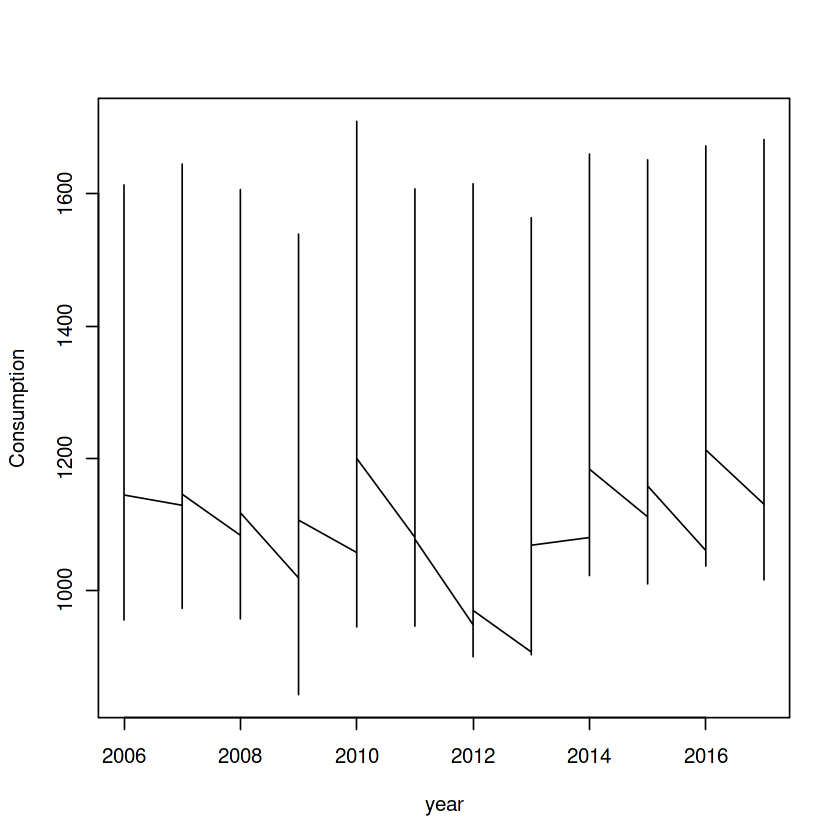

In [ ]:
#visualization of data using plot()

#option 1:

plot(mydata2$year, mydata$Consumption, type='l', xlab='year', ylab='Consumption')

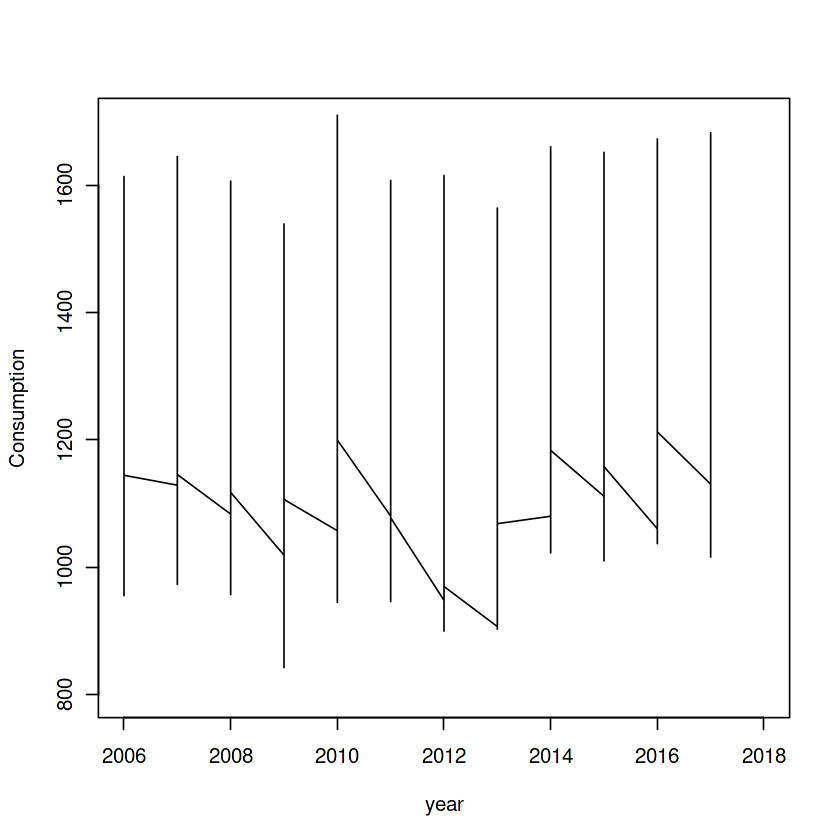

In [ ]:
#option 2:
plot(mydata2$year, mydata$Consumption, type='l', xlab='year', ylab='Consumption'
    ,lty=1,ylim=c(800,1700), xlim=c(2006,2018))

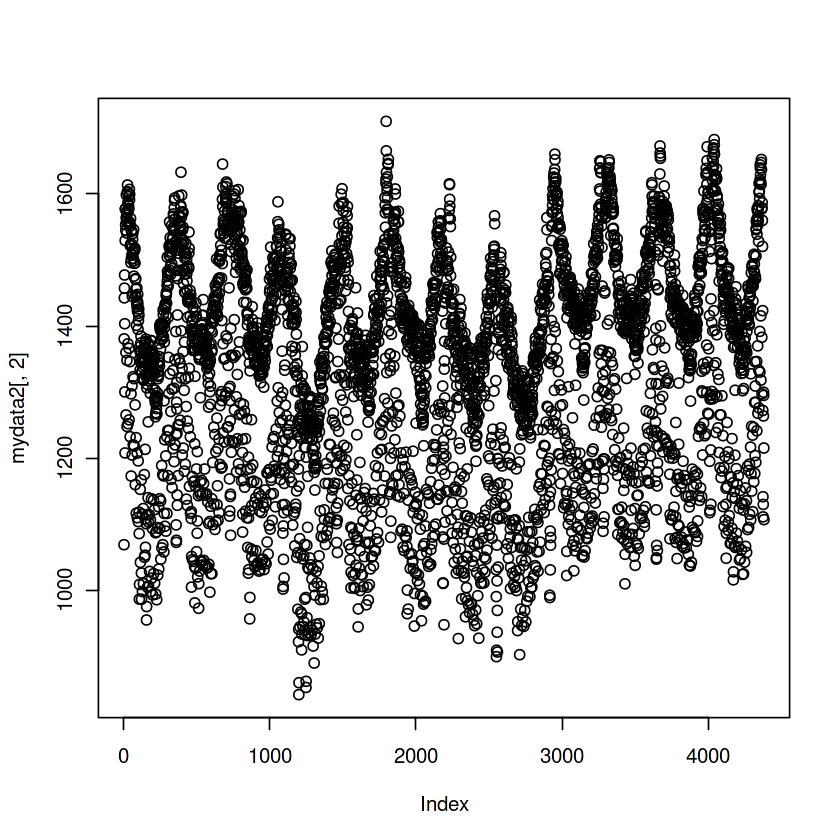

In [ ]:
#option 3:
par(mfrow=c(1,1))
plot(mydata2[,2])

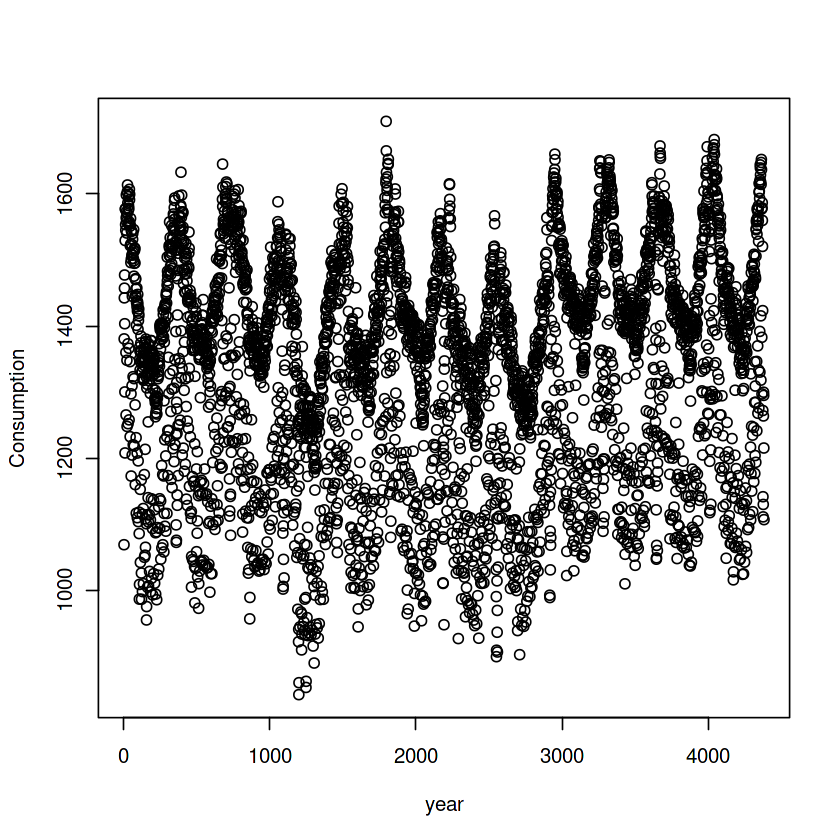

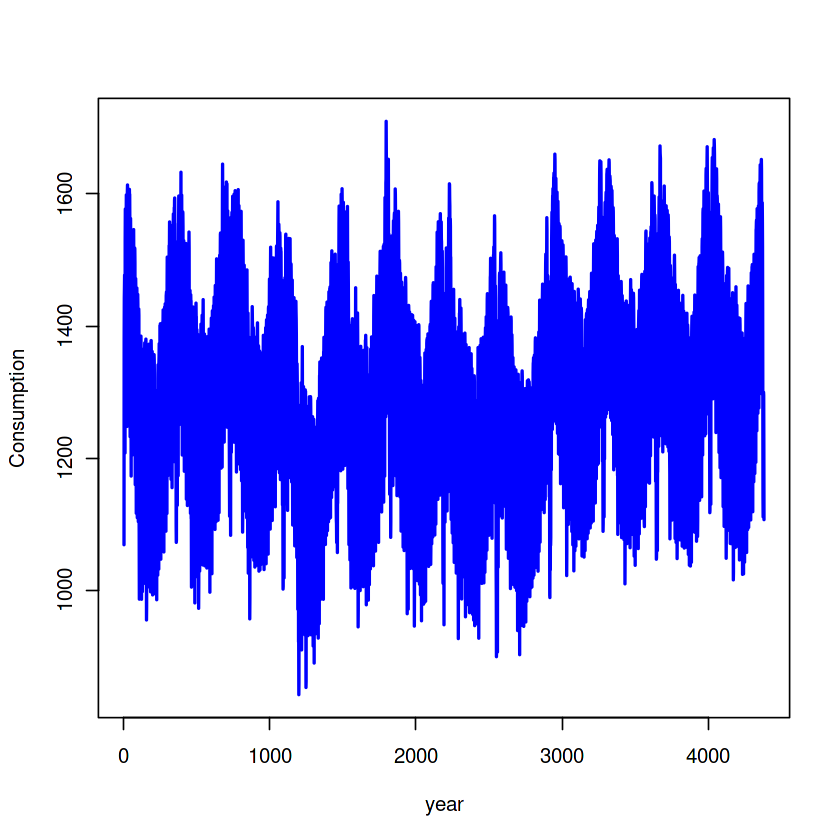

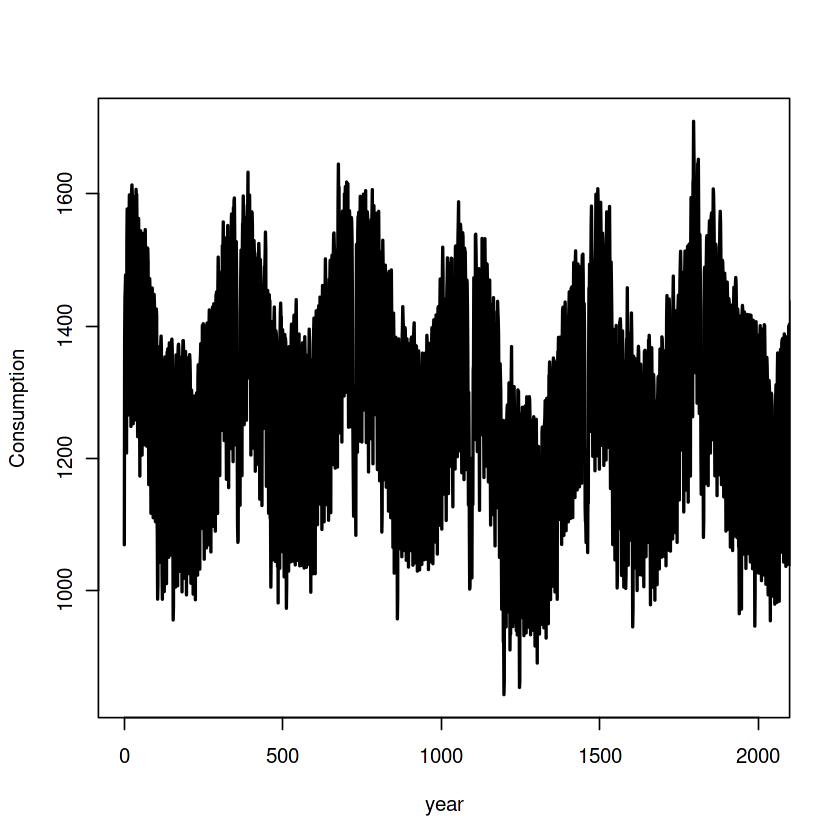

In [ ]:
#option 4:
plot(mydata2[,2], xlab='year',ylab='Consumption')
plot(mydata2[,2], xlab='year',ylab='Consumption', type='l',lwd=2, col='blue')
plot(mydata2[,2], xlab='year',ylab='Consumption', type='l',lwd=2, xlim=c(0,2018))

In [ ]:
#using ggplot2
install.packages('ggplot2')
library(ggplot2)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



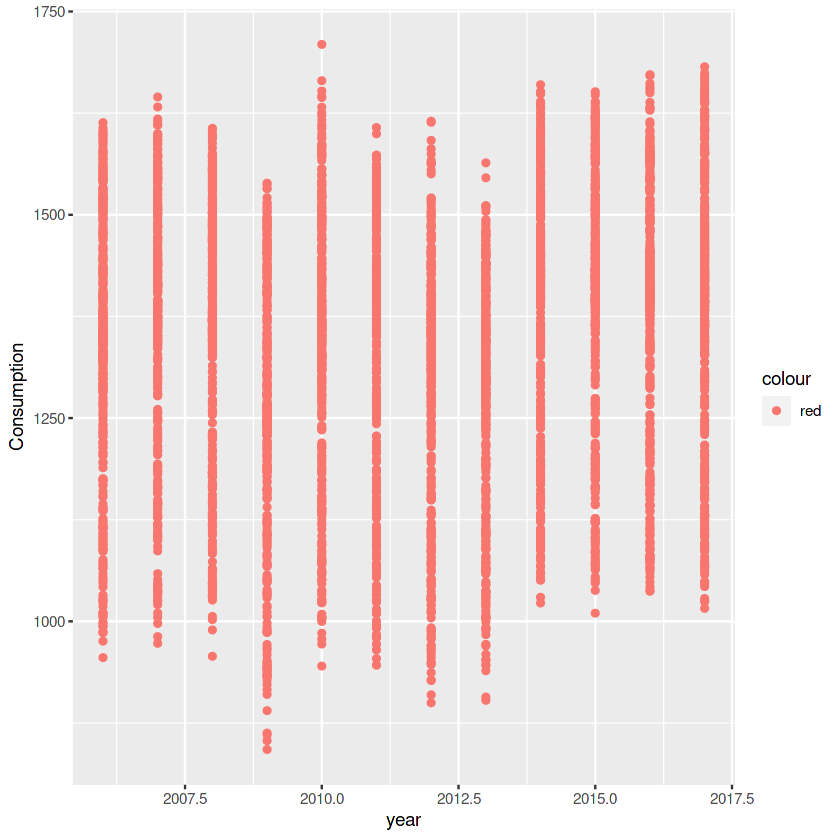

In [ ]:
ggplot(data=mydata2, aes(x=year, y=Consumption, col='red')) + geom_point()

In [ ]:
#plot data considering solar and wind time series

#wind column
min(mydata2[,3], na.rm=TRUE)
max(mydata2[,3], na.rm=TRUE)

#consumption column
min(mydata2[,2], na.rm=TRUE)
max(mydata2[,2], na.rm=TRUE)

#solar column
min(mydata2[,4], na.rm=TRUE)
max(mydata2[,4], na.rm=TRUE)

#wind + solar
min(mydata2[,5], na.rm=TRUE)
max(mydata2[,5], na.rm=TRUE)


#for multiple plots
par(mfrow=c(3,1))

[1] 5.757

[1] 826.278

[1] 842.395

[1] 1709.568

[1] 1.968

[1] 241.58

[1] 21.478

[1] 851.556

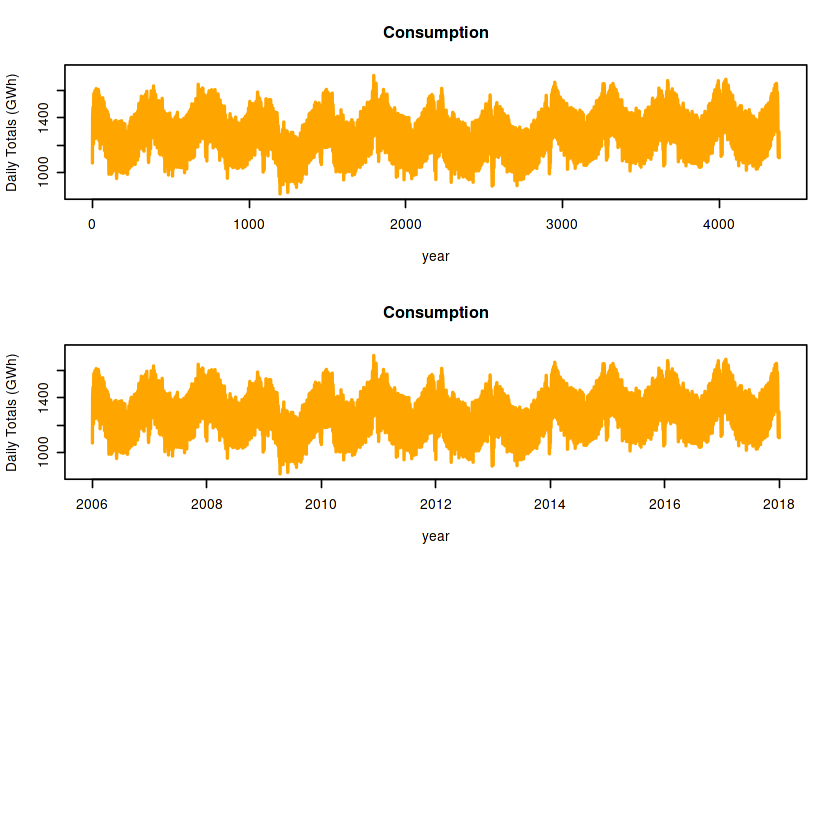

In [ ]:
#for multiple plots
par(mfrow=c(3,1))

plot1 <- plot(mydata2[,2],xlab='year',ylab='Daily Totals (GWh)', type='l',
             lwd=2, main='Consumption', col='orange', ylim=c(840,1750))
plot1 <- plot(mydata2[,1],mydata2[,2],xlab='year',ylab='Daily Totals (GWh)', type='l',
             lwd=2, main='Consumption', col='orange', ylim=c(840,1750))

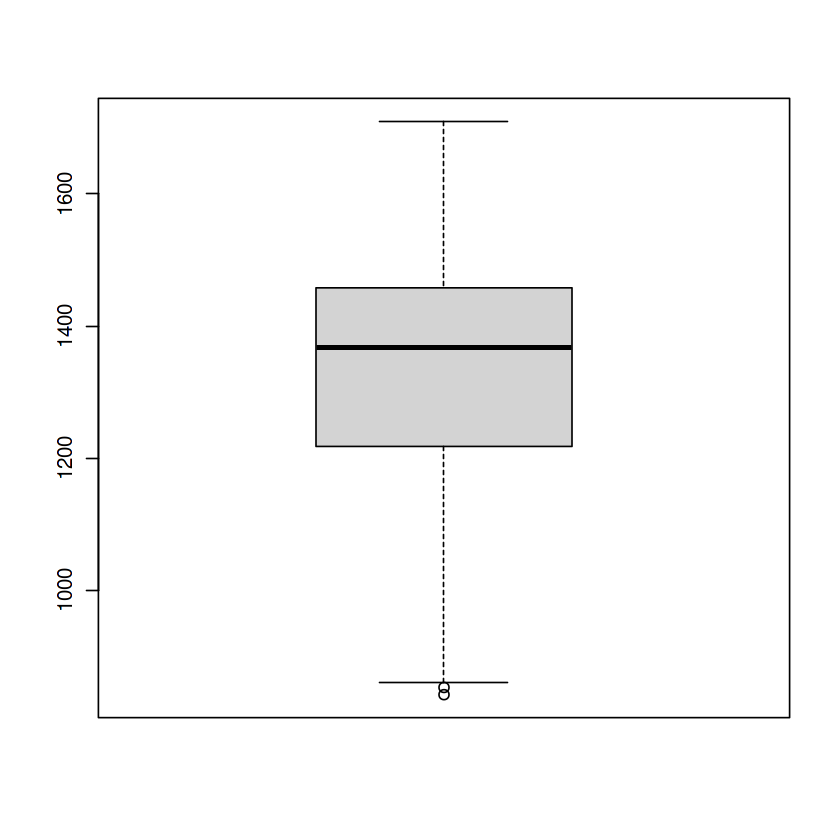

In [ ]:
boxplot(mydata$Consumption)

0%      25%      50%      75%     100% 
 842.395 1217.859 1367.123 1457.761 1709.568

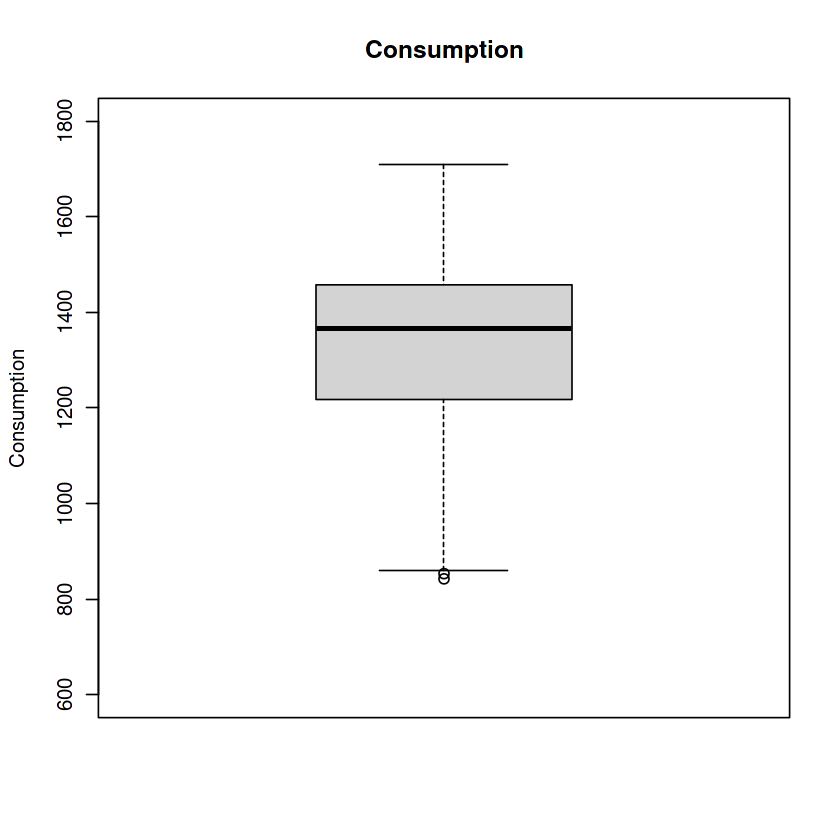

In [ ]:
quantile(mydata2$Consumption, probs=c(0,0.25,0.5,0.75,1))

boxplot(mydata2$Consumption, main="Consumption", ylab="Consumption",
       ylim=c(600,1800))

In [ ]:
library(dplyr)
summary(mydata2)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




      Date             Consumption          Wind             Solar        
 Min.   :2006-01-01   Min.   : 842.4   Min.   :  5.757   Min.   :  1.968  
 1st Qu.:2008-12-31   1st Qu.:1217.9   1st Qu.: 62.353   1st Qu.: 35.179  
 Median :2012-01-01   Median :1367.1   Median :119.098   Median : 86.407  
 Mean   :2012-01-01   Mean   :1338.7   Mean   :164.814   Mean   : 89.259  
 3rd Qu.:2014-12-31   3rd Qu.:1457.8   3rd Qu.:217.900   3rd Qu.:135.071  
 Max.   :2017-12-31   Max.   :1709.6   Max.   :826.278   Max.   :241.580  
                                       NA's   :1463      NA's   :2195     
   Wind.Solar          year          month             day       
 Min.   : 21.48   Min.   :2006   Min.   : 1.000   Min.   : 1.00  
 1st Qu.:172.19   1st Qu.:2008   1st Qu.: 4.000   1st Qu.: 8.00  
 Median :240.99   Median :2012   Median : 7.000   Median :16.00  
 Mean   :272.66   Mean   :2012   Mean   : 6.523   Mean   :15.73  
 3rd Qu.:338.99   3rd Qu.:2014   3rd Qu.:10.000   3rd Qu.:23.00  
 Max